In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/niravpatidar37/Mental-Health/main/Mental%20Health%20Dataset.csv")

In [2]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [5]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [6]:
mode_value = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(mode_value)

In [7]:
# Display the number of missing values after filling
print(df.isnull().sum())

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


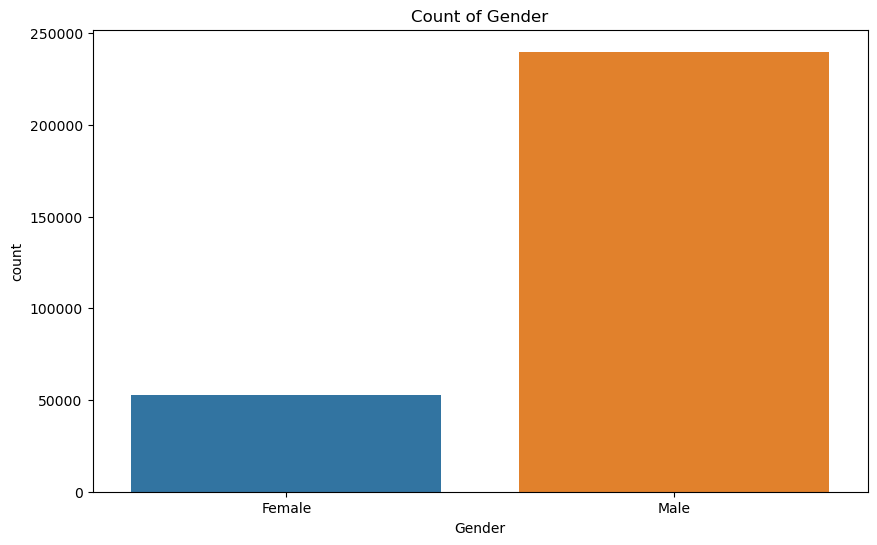

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count of Gender')
plt.show()

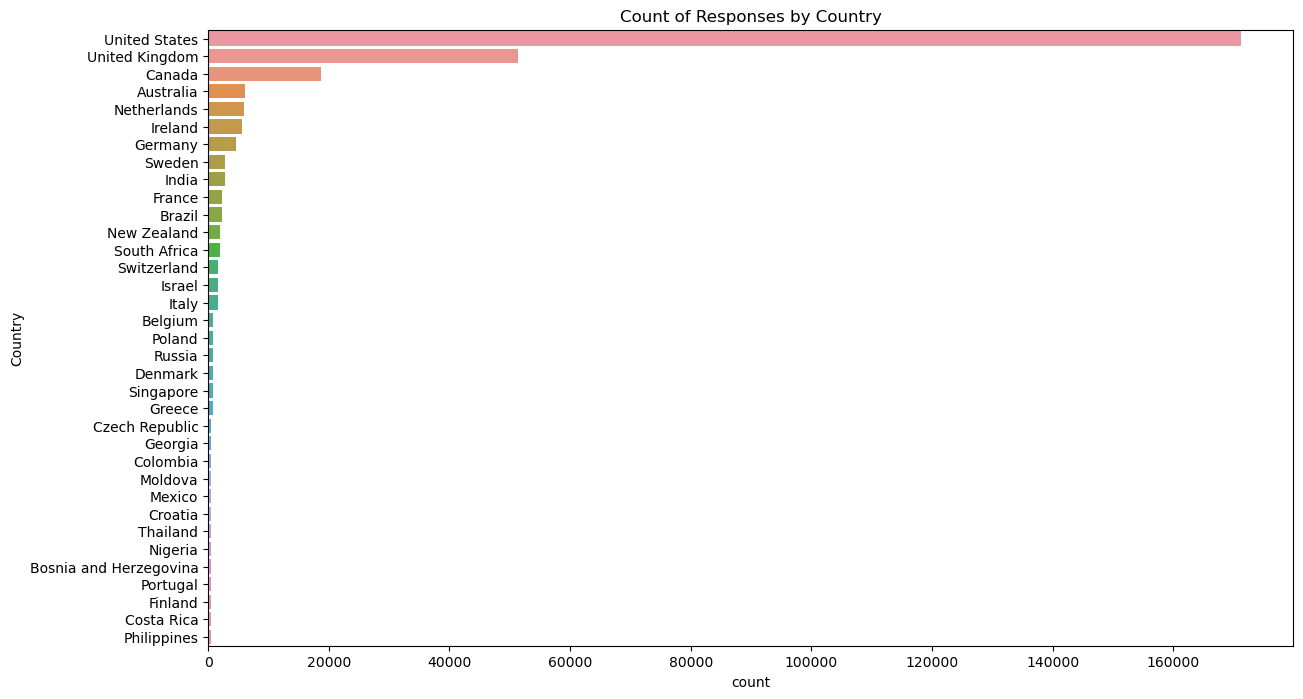

In [9]:
# Bar plot for 'Country'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index)
plt.title('Count of Responses by Country')
plt.show()

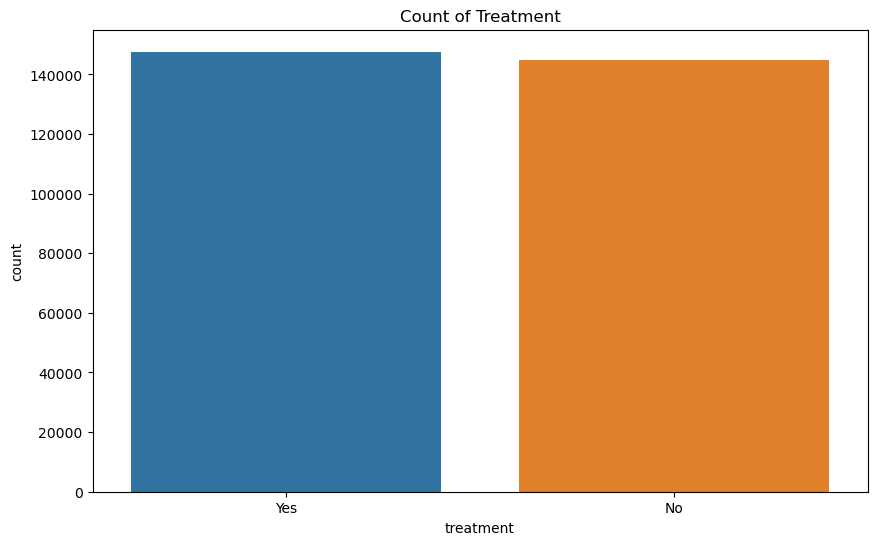

In [10]:
# Count plot for 'treatment'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment')
plt.title('Count of Treatment')
plt.show()

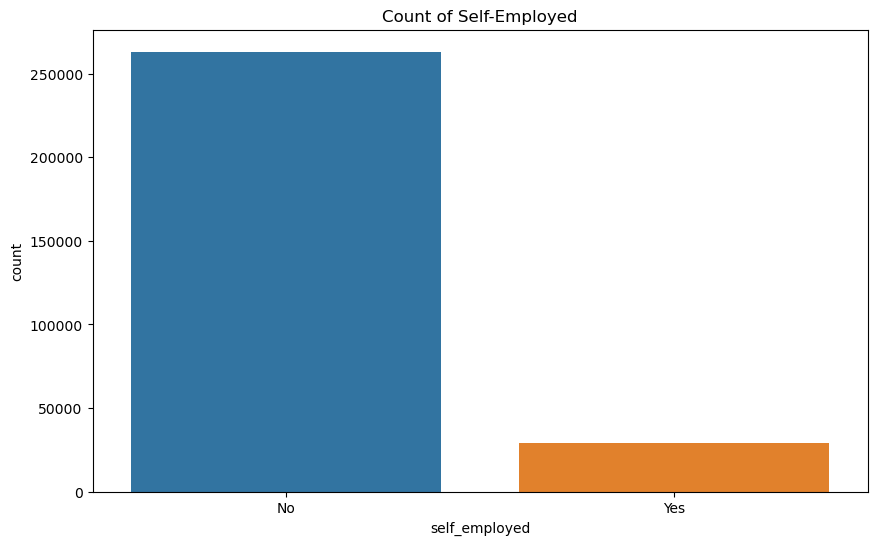

In [11]:
# Count plot for 'self_employed'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='self_employed')
plt.title('Count of Self-Employed')
plt.show()

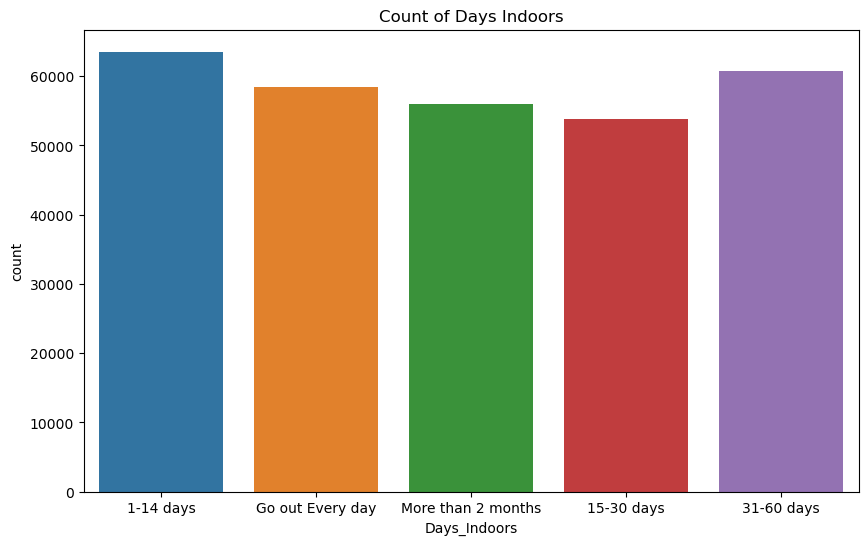

In [12]:
# Count plot for 'Days_Indoors'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Days_Indoors')
plt.title('Count of Days Indoors')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

df = df.drop(columns=['Timestamp'])

# Apply label encoding to categorical columns
categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 
                       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 
                       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 
                       'Work_Interest', 'Social_Weakness', 'mental_health_interview', 
                       'care_options']

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   Gender  Country  Occupation  self_employed  family_history  treatment  \
0       0       34           1              0               0          1   
1       0       34           1              0               1          1   
2       0       34           1              0               1          1   
3       0       34           1              0               1          1   
4       0       34           1              0               1          1   

   Days_Indoors  Growing_Stress  Changes_Habits  Mental_Health_History  \
0             0               2               1                      2   
1             0               2               1                      2   
2             0               2               1                      2   
3             0               2               1                      2   
4             0               2               1                      2   

   Mood_Swings  Coping_Struggles  Work_Interest  Social_Weakness  \
0            2                

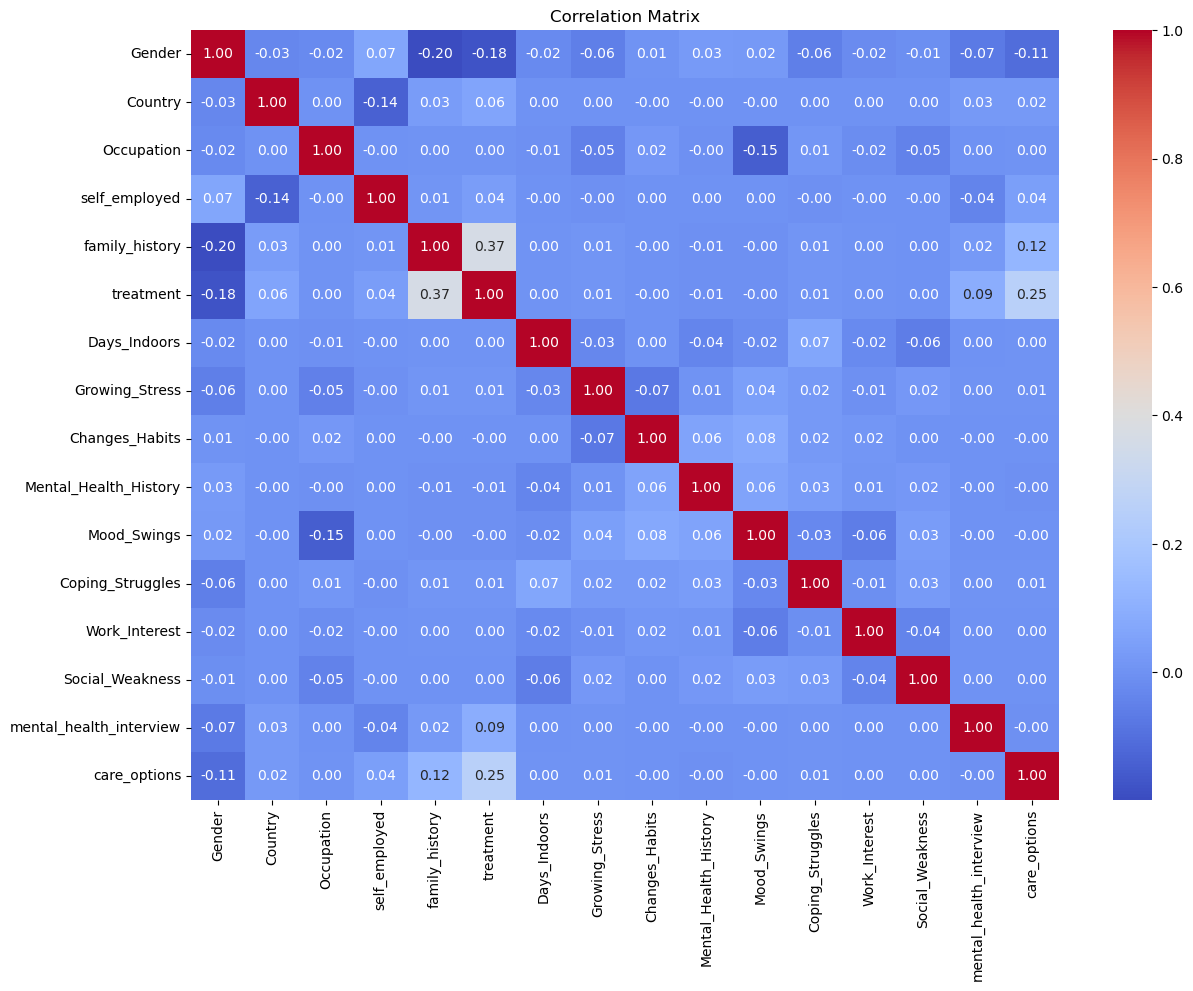

In [14]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Define features and target
X = df.drop(columns=['treatment'])
y = df['treatment']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7032989584936638
Confusion Matrix:
[[19863  9032]
 [ 8317 21261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     28895
           1       0.70      0.72      0.71     29578

    accuracy                           0.70     58473
   macro avg       0.70      0.70      0.70     58473
weighted avg       0.70      0.70      0.70     58473



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7546217912540831
Confusion Matrix:
[[21009  7886]
 [ 6462 23116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75     28895
           1       0.75      0.78      0.76     29578

    accuracy                           0.75     58473
   macro avg       0.76      0.75      0.75     58473
weighted avg       0.76      0.75      0.75     58473



In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
gb = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV to search for the best parameters
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.1}
Accuracy: 0.7776409624955107
Confusion Matrix:
[[20699  8196]
 [ 4806 24772]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     28895
           1       0.75      0.84      0.79     29578

    accuracy                           0.78     58473
   macro avg       0.78      0.78      0.78     58473
weighted avg       0.78      0.78      0.78     58473

